## Analysis

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, log_loss, matthews_corrcoef

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/veneta13/FMI-ML/main/Coursework/models/titanic/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/veneta13/FMI-ML/main/Coursework/models/titanic/test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [102]:
for col in df:
  unq_vals = df[col].unique()
  num_unq_vals = len(unq_vals)
  
  if num_unq_vals < 12:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} | {unq_vals}')
  else:
    print(f'{col:17} | {df[col].dtype} | {num_unq_vals:5} |')

PassengerId       | int64 |   891 |
Survived          | int64 |     2 | [0 1]
Pclass            | int64 |     3 | [3 1 2]
Name              | object |   891 |
Sex               | object |     2 | ['male' 'female']
Age               | float64 |    89 |
SibSp             | int64 |     7 | [1 0 3 4 2 5 8]
Parch             | int64 |     7 | [0 1 2 5 3 4 6]
Ticket            | object |   681 |
Fare              | float64 |   248 |
Cabin             | object |   148 |
Embarked          | object |     4 | ['S' 'C' 'Q' nan]


In [103]:
missing_value_cols = [col for col in df if df[col].isna().sum() > (0.2 * df.shape[0])]
missing_value_cols

['Cabin']

*Notes:*
- **PassengerId** and **Name** are unique for all passengers - must be removed.
- **Age** and **Embarked** have null values for some passengers.
- **Embarked**, **Ticket** and **Sex** are objects.
- **Cabin** has non-NaN values for < 20%. 

In [104]:
df.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [105]:
df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [106]:
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [107]:
df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [108]:
df['Ticket'].value_counts().value_counts()

1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: Ticket, dtype: int64

Most **Ticket** values are unique.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

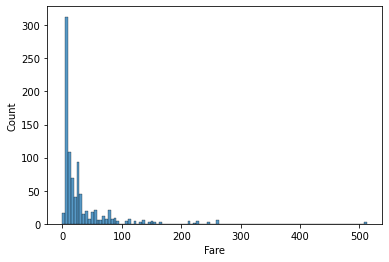

In [109]:
sns.histplot(df['Fare'])

**Fare** is skewed to the left.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

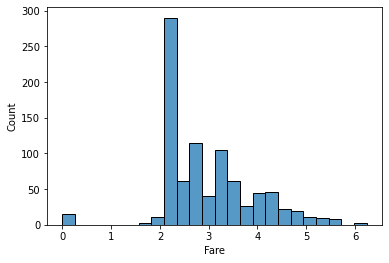

In [110]:
sns.histplot(np.log1p(df['Fare']))

## Preprocessing

In [111]:
def preprocess_inputs(df, scale=True, split=True):
  df = df.copy()

  df = df.drop(['Name', 'PassengerId','Cabin', 'Ticket'], axis=1)

  df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
  df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

  df['Fare'] = np.log1p(df['Fare'])
  df['Age'] = np.log1p(df['Age'])

  dummies = pd.get_dummies(df.select_dtypes('object'))
  df = df.drop(df.select_dtypes('object').columns, axis=1)
  result = pd.concat([df, dummies], axis=1)

  X = result.drop(['Survived'], axis=1) if 'Survived' in df.columns else result
  y = result['Survived'] if 'Survived' in df.columns else None

  if scale:
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

  if split == False:
    return X, y

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
  
  return X_train, X_test, y_train, y_test

In [112]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [113]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
502,0.827377,-0.052363,-0.474545,-0.473674,-0.833341,1.355574,-1.355574,-0.482043,3.251373,-1.623803
520,-1.566107,0.299057,-0.474545,-0.473674,1.637942,1.355574,-1.355574,-0.482043,-0.307562,0.615838
728,-0.369365,0.011711,0.432793,-0.473674,0.344439,-0.737695,0.737695,-0.482043,-0.307562,0.615838
144,-0.369365,-0.500701,-0.474545,-0.473674,-0.450713,-0.737695,0.737695,-0.482043,-0.307562,0.615838
603,0.827377,0.907884,-0.474545,-0.473674,-0.784179,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
663,0.827377,0.588103,-0.474545,-0.473674,-0.849427,-0.737695,0.737695,-0.482043,-0.307562,0.615838
224,-1.566107,0.674105,0.432793,-0.473674,1.598975,-0.737695,0.737695,-0.482043,-0.307562,0.615838
106,0.827377,-0.261200,-0.474545,-0.473674,-0.830855,1.355574,-1.355574,-0.482043,-0.307562,0.615838
128,0.827377,-0.052363,0.432793,0.767630,0.194843,1.355574,-1.355574,2.074505,-0.307562,-1.623803


## Classification

In [114]:
model = {}

### KNN

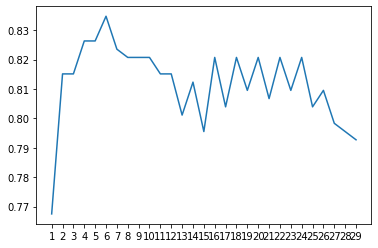

In [115]:
model['KNN'] = None
best_score = -1
scores = {}

for neighs in range(1, 30):
  current_model = KNeighborsClassifier(neighs)
  current_model.fit(X_train, y_train)

  score = current_model.score(X_test, y_test)

  if score > best_score:
    best_score = score
    model['KNN'] = current_model
  
  scores[str(neighs)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [116]:
y_pred = model['KNN'].predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Best score: {best_score}')

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       225
           1       0.83      0.69      0.76       132

    accuracy                           0.83       357
   macro avg       0.83      0.80      0.82       357
weighted avg       0.83      0.83      0.83       357

Best score: 0.834733893557423


In [117]:
print(confusion_matrix(y_test, y_pred))

[[207  18]
 [ 41  91]]


In [118]:
matthews_corrcoef(y_test, y_pred)

0.6387593436909706

### Logistic Regression

In [119]:
model['LogReg'] = LogisticRegression()
model['LogReg'].fit(X_train, y_train)
score = model['LogReg'].score(X_test, y_test)
print(f'Score: {score}')

Score: 0.7899159663865546


In [120]:
y_pred = model['LogReg'].predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       225
           1       0.70      0.75      0.73       132

    accuracy                           0.79       357
   macro avg       0.77      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357



In [121]:
print(confusion_matrix(y_test, y_pred))

[[183  42]
 [ 33  99]]


In [122]:
matthews_corrcoef(y_test, y_pred)

0.5562976721853168

In [123]:
log_loss(y_test, model['LogReg'].predict_proba(X_test))

0.4514786726404421

In [124]:
log_loss(y_train, model['LogReg'].predict_proba(X_train))

0.42065401595168145

## Export

In [125]:
X_test, _ = preprocess_inputs(df_test, split=False, scale=True)
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.542345,-0.499470,-0.400248,-0.864914,-0.755929,0.755929,-0.568142,2.843757,-1.350676
1,0.873482,1.061671,0.616992,-0.400248,-0.966948,1.322876,-1.322876,-0.568142,-0.351647,0.740370
2,-0.315819,1.529809,-0.499470,-0.400248,-0.667296,-0.755929,0.755929,-0.568142,2.843757,-1.350676
3,0.873482,0.133782,-0.499470,-0.400248,-0.771606,-0.755929,0.755929,-0.568142,-0.351647,0.740370
4,0.873482,-0.204858,0.616992,0.619896,-0.442015,1.322876,-1.322876,-0.568142,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,-0.281382,-0.499470,-0.400248,-0.839359,-0.755929,0.755929,-0.568142,-0.351647,0.740370
414,-1.505120,0.747802,-0.499470,-0.400248,1.743814,1.322876,-1.322876,1.760125,-0.351647,-1.350676
415,0.873482,0.726148,-0.499470,-0.400248,-0.935112,-0.755929,0.755929,-0.568142,-0.351647,0.740370
416,0.873482,-0.281382,-0.499470,-0.400248,-0.839359,-0.755929,0.755929,-0.568142,-0.351647,0.740370


In [126]:
prediction = model['KNN'].predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction})
output.to_csv('submission_knn.csv', index=False)
# Score: 0.76794

In [127]:
prediction = model['LogReg'].predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': prediction})
output.to_csv('submission_logreg.csv', index=False)
# Score: 0.75598